## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from matplotlib.pyplot import figure

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
# Display the data table for preview
mouse_data_df = pd.DataFrame.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice
count = mouse_data_df["Mouse ID"].value_counts()
count

g989    13
s337    10
r554    10
g791    10
m957    10
        ..
b447     1
d133     1
x336     1
x226     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

In [6]:
# Counting the different drug regimens
count = mouse_data_df["Drug Regimen"].value_counts()
count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

In [7]:
# Getting a list of all the columns
mouse_data_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [8]:
# Getting the duplicate mice and timepoints
mouse_duplicated_df = mouse_data_df.loc[mouse_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_data_df[mouse_data_df['Mouse ID'].isin(mouse_duplicated_df)==False]
clean_mouse_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_mouse_df["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics

In [11]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).mean()
median = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).median()
var = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).var()
std = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).std()
sem = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_aggMethod =  clean_mouse_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggMethod

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

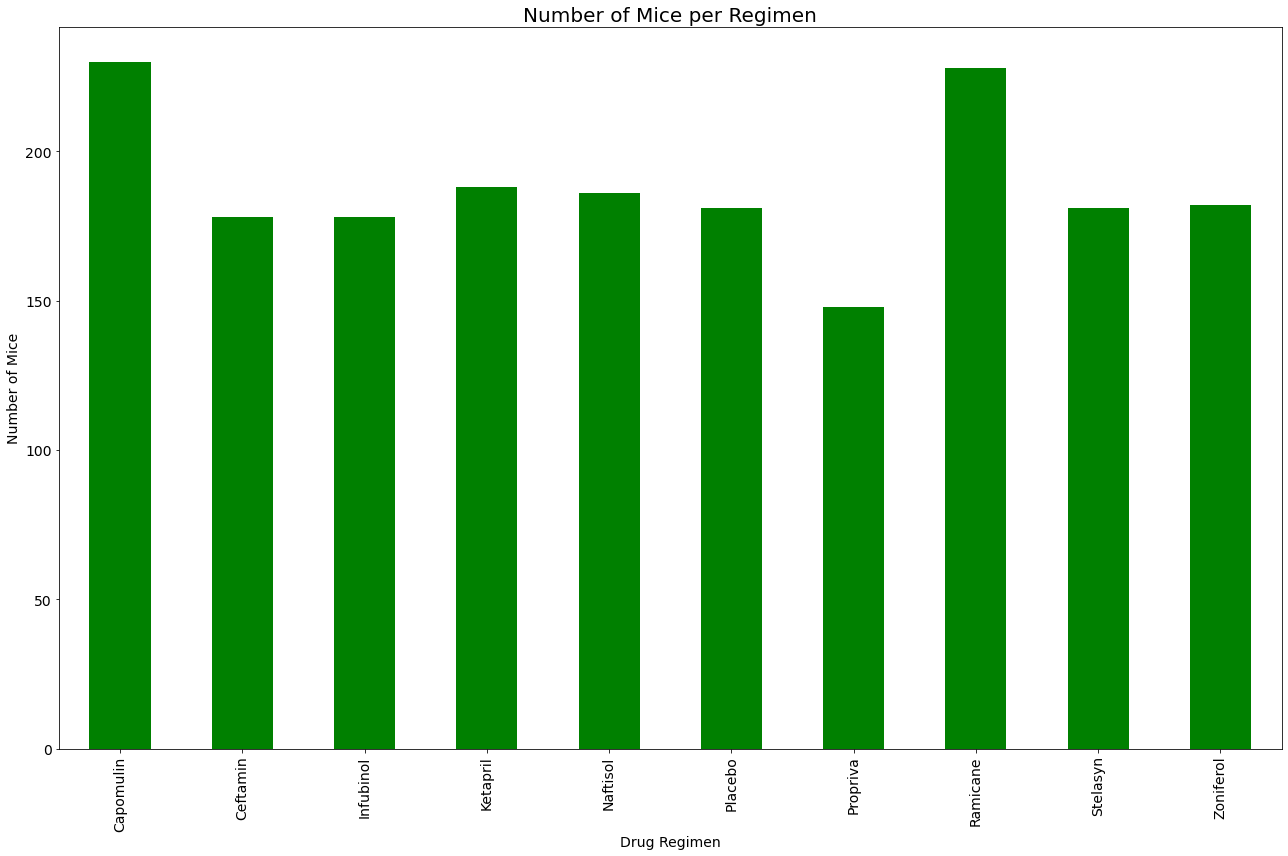

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [13]:
# Generate a bar plot showing the total number of mice tested for each drug regimen using Pandas.
mice_count_perReg = clean_mouse_df.groupby(['Drug Regimen']).count()['Mouse ID']

pandas_plot = mice_count_perReg.plot.bar(figsize=(18, 12), color='g', fontsize = 14)
mice_count_perReg
plt.xlabel('Drug Regimen', fontsize = 14)
plt.ylabel('Number of Mice',fontsize = 14)
plt.title('Number of Mice per Regimen', fontsize = 20)

plt.savefig("C:/Users/abrow/Desktop/EMERSON_BOOTCAMP/BOOTCAMP_AMB/Homeworks/HW5_10-16-21_Matplotlib_Homework/Mtplotlib-challenge/Images/MicePerReg_Pandas.png")
plt.tight_layout()
plt.show()

mice_count_perReg

In [14]:
# Creating an array to store the number of mice in each regimen
datapoints = (clean_mouse_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
datapoints

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

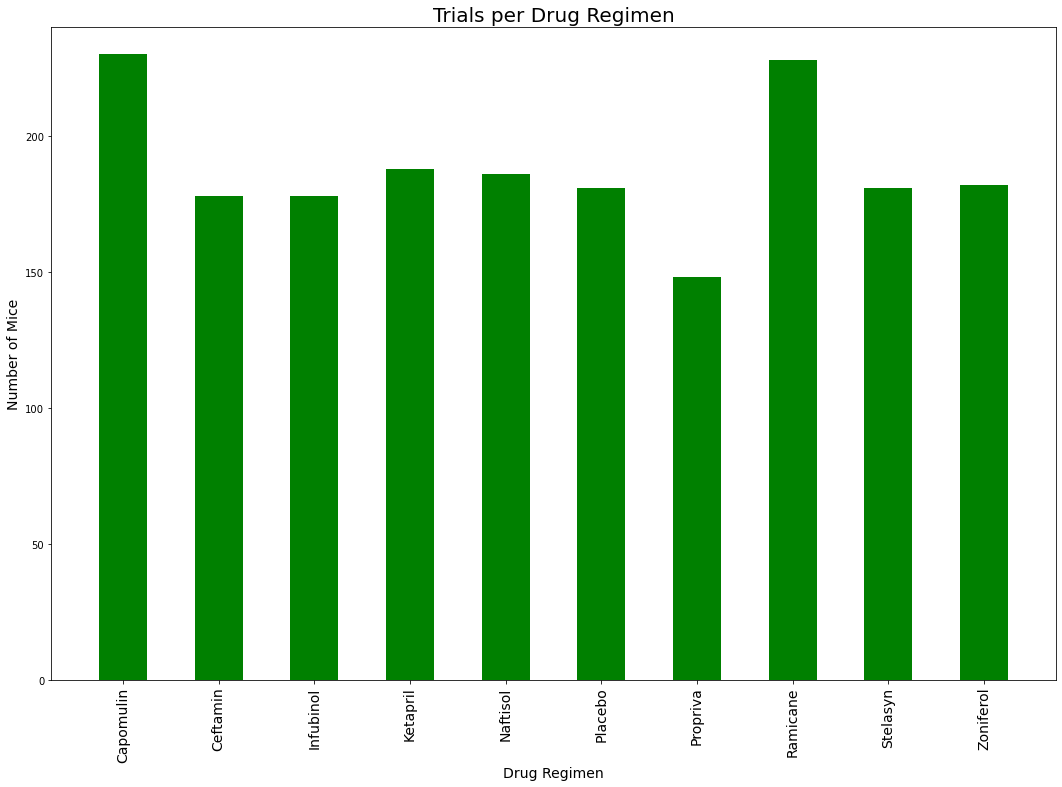

<Figure size 432x288 with 0 Axes>

In [16]:
# Generate a bar plot showing the total number of  mice tested for each drug regimen using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(datapoints))
plt.figure(figsize=(18,12))
plt.bar(x_axis, datapoints, color = "g", width = .5, align='center')
tick_locs = [value for value in x_axis]
plt.xticks(tick_locs, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],fontsize=14,rotation="vertical")

# Set x and y limits, title and label
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(datapoints)+10)
plt.title("Trials per Drug Regimen", fontsize=20)
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Number of Mice",fontsize=14)
plt.show()

plt.savefig("C:/Users/abrow/Desktop/EMERSON_BOOTCAMP/BOOTCAMP_AMB/Homeworks/HW5_10-16-21_Matplotlib_Homework/Mtplotlib-challenge/Images/MicePerReg_Pyplot.png")



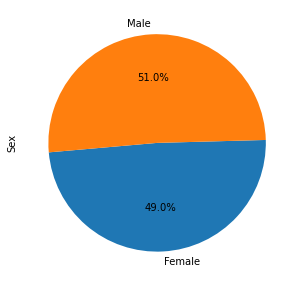

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# used the groupedby 'Sex' data and used count function to determine total number of mice of each sex
sex = clean_mouse_df.groupby(['Sex'])['Sex'].count()
# plotted chart using pandas .plot.pie() 
sex.plot.pie(startangle=185,autopct='%1.1f%%', figsize=(5, 5))

plt.savefig("C:/Users/abrow/Desktop/EMERSON_BOOTCAMP/BOOTCAMP_AMB/Homeworks/HW5_10-16-21_Matplotlib_Homework/Mtplotlib-challenge/Images/MiceByGender_Pandas.png")

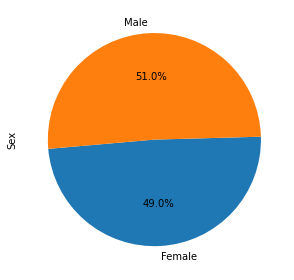

<Figure size 432x288 with 0 Axes>

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# used the groupedby 'Sex' data and pyplotted it
plt.pie(sex, labels=('Female', 'Male'), startangle=185, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.tight_layout()
plt.show()
plt.savefig("C:/Users/abrow/Desktop/EMERSON_BOOTCAMP/BOOTCAMP_AMB/Homeworks/HW5_10-16-21_Matplotlib_Homework/Mtplotlib-challenge/Images/MiceByGender_Pyplot.png")

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin",:]
ramicane = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ramicane",:]
ceftamin = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ceftamin",:]
infubinol = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Infubinol",:]

In [20]:
# Start by getting the last (greatest) timepoint for each mouse and create a new dataframe

#Capomulin
cap_last = capomulin.groupby('Mouse ID').max()['Timepoint']
cap_vol = pd.DataFrame(cap_last)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap_merge = pd.merge(cap_vol, clean_mouse_df, on=("Mouse ID", "Timepoint"),how="left")
cap_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [25]:
# Capomulin cont'd.
cap_tumors = cap_merge["Tumor Volume (mm3)"]

cap_quartiles = cap_tumors.quantile([.25,.5,.75])
cap_lowQ = cap_quartiles[0.25]
cap_highQ = cap_quartiles[0.75]
cap_iqr = cap_highQ-cap_lowQ
cap_lower_bound = cap_lowQ - (1.5*cap_iqr)
cap_upper_bound = cap_highQ + (1.5*cap_iqr)

print(f"The lower quartile of Capomulin tumors: {cap_lowQ}.")
print(f"The upper quartile of Capomulin tumors: {cap_highQ}.")
print(f"The interquartile range of Capomulin tumors: {cap_iqr}.")
print(f"The median of Capomulin tumors: {cap_quartiles[0.5]}.")
print(f"Possible outliers could include values below {cap_lower_bound}.")
print(f"Possible outliers could include values above {cap_upper_bound}.")

The lower quartile of Capomulin tumors: 32.37735684.
The upper quartile of Capomulin tumors: 40.1592203.
The interquartile range of Capomulin tumors: 7.781863460000004.
The median of Capomulin tumors: 38.1251644.
Possible outliers could include values below 20.70456164999999.
Possible outliers could include values above 51.83201549.


In [21]:
# Start by getting the last (greatest) timepoint for each mouse and create a new dataframe

# Ramicane
ram_last = ramicane.groupby('Mouse ID').max()['Timepoint']
ram_vol = pd.DataFrame(ram_last)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ram_merge = pd.merge(ram_vol, clean_mouse_df, on=("Mouse ID", "Timepoint"),how="left")
ram_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [27]:
# Ramicane cont'd.
ram_tumors = ram_merge["Tumor Volume (mm3)"]

ram_quartiles = ram_tumors.quantile([.25,.5,.75])
ram_lowQ = ram_quartiles[0.25]
ram_highQ = ram_quartiles[0.75]
ram_iqr = ram_highQ-ram_lowQ
ram_lower_bound = ram_lowQ - (1.5*ram_iqr)
ram_upper_bound = ram_highQ + (1.5*ram_iqr)

print(f"The lower quartile of ramicane tumors: {ram_lowQ}.")
print(f"The upper quartile of ramicane tumors: {ram_highQ}.")
print(f"The interquartile range of ramicane tumors: {ram_iqr}.")
print(f"The median of ramicane tumors: {ram_quartiles[0.5]}.")
print(f"Possible outliers could include values below {ram_lower_bound}.")
print(f"Possible outliers could include values above {ram_upper_bound}.")

The lower quartile of ramicane tumors: 31.56046955.
The upper quartile of ramicane tumors: 40.65900627.
The interquartile range of ramicane tumors: 9.098536719999998.
The median of ramicane tumors: 36.56165229.
Possible outliers could include values below 17.912664470000003.
Possible outliers could include values above 54.30681135.


In [22]:
# Start by getting the last (greatest) timepoint for each mouse and create a new dataframe

# Ceftamin
ceft_last = ceftamin.groupby('Mouse ID').max()['Timepoint']
ceft_vol = pd.DataFrame(ceft_last)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ceft_merge = pd.merge(ceft_vol, clean_mouse_df, on=("Mouse ID", "Timepoint"),how="left")
ceft_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [28]:
# Ceftamin cont'd.
ceft_tumors = ceft_merge["Tumor Volume (mm3)"]

ceft_quartiles = ceft_tumors.quantile([.25,.5,.75])
ceft_lowQ = ceft_quartiles[0.25]
ceft_highQ = ceft_quartiles[0.75]
ceft_iqr = ceft_highQ-ceft_lowQ
ceft_lower_bound = ceft_lowQ - (1.5*ceft_iqr)
ceft_upper_bound = ceft_highQ + (1.5*ceft_iqr)

print(f"The lower quartile of ceftamin tumors: {ceft_lowQ}.")
print(f"The upper quartile of ceftamin tumors: {ceft_highQ}.")
print(f"The interquartile range of ceftamin tumors: {ceft_iqr}.")
print(f"The median of ceftamin tumors: {ceft_quartiles[0.5]}.")
print(f"Possible outliers could include values below {ceft_lower_bound}.")
print(f"Possible outliers could include values above {ceft_upper_bound}.")

The lower quartile of ceftamin tumors: 48.72207785.
The upper quartile of ceftamin tumors: 64.29983003.
The interquartile range of ceftamin tumors: 15.577752179999997.
The median of ceftamin tumors: 59.85195552.
Possible outliers could include values below 25.355449580000002.
Possible outliers could include values above 87.66645829999999.


In [23]:
# Start by getting the last (greatest) timepoint for each mouse and create a new dataframe
infu_last = infubinol.groupby('Mouse ID').max()['Timepoint']
infu_vol = pd.DataFrame(infu_last)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
infu_merge = pd.merge(infu_vol, clean_mouse_df, on=("Mouse ID", "Timepoint"),how="left")
infu_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [29]:
infu_tumors = infu_merge["Tumor Volume (mm3)"]

infu_quartiles = infu_tumors.quantile([.25,.5,.75])
infu_lowQ = infu_quartiles[0.25]
infu_highQ = infu_quartiles[0.75]
infu_iqr = infu_highQ-infu_lowQ
infu_lower_bound = infu_lowQ - (1.5*infu_iqr)
infu_upper_bound = infu_highQ + (1.5*infu_iqr)

print(f"The lower quartile of infubinol tumors: {infu_lowQ}.")
print(f"The upper quartile of infubinol tumors: {infu_highQ}.")
print(f"The interquartile range of infubinol tumors: {infu_iqr}.")
print(f"The median of infubinol tumors: {infu_quartiles[0.5]}.")
print(f"Possible outliers could include values below {infu_lower_bound}.")
print(f"Possible outliers could include values above {infu_upper_bound}.")

The lower quartile of infubinol tumors: 54.04860769.
The upper quartile of infubinol tumors: 65.52574285.
The interquartile range of infubinol tumors: 11.477135160000003.
The median of infubinol tumors: 60.16518046.
Possible outliers could include values below 36.83290494999999.
Possible outliers could include values above 82.74144559000001.


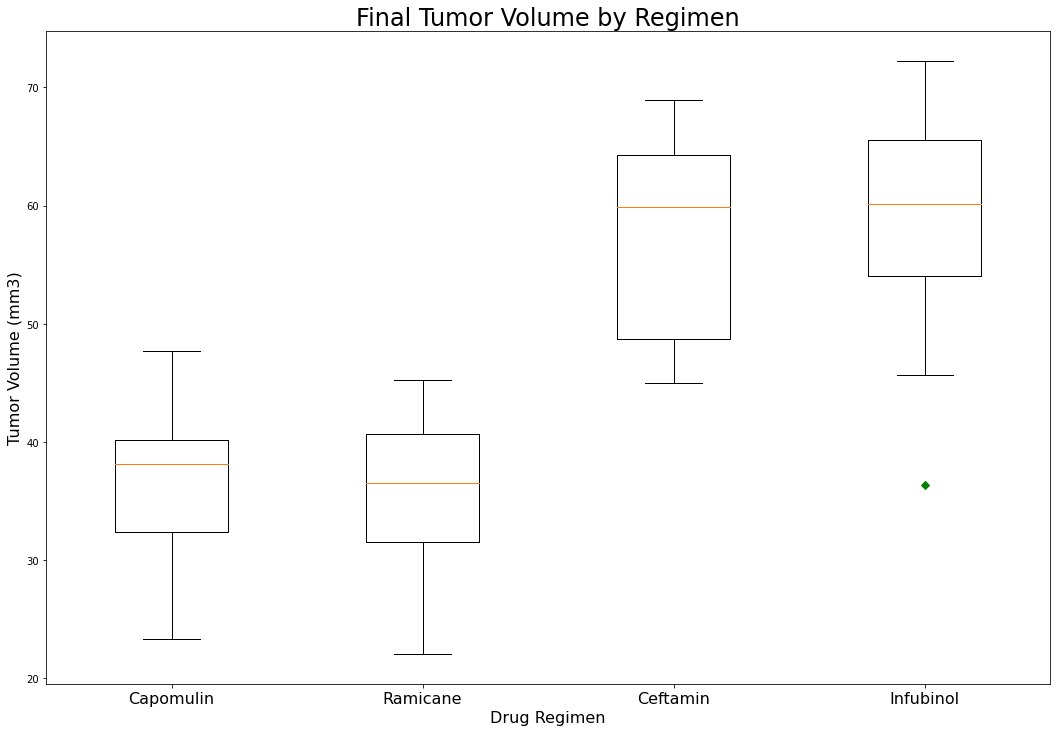

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Created a list to use for the boxplot
boxplot_list = [cap_tumors, ram_tumors, ceft_tumors, infu_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Ceftamin', 'Infubinol']
# used plt.subplots to define size
fig1, ax = plt.subplots(figsize=(18,12))
ax.set_title('Final Tumor Volume by Regimen', fontsize=24)
ax.set_xlabel('Drug Regimen', fontsize=16)
ax.set_ylabel('Tumor Volume (mm3)',fontsize=16)
ax.boxplot(boxplot_list, 0, 'gD')
plt.xticks([1,2,3,4], Regimen, fontsize=16)
plt.savefig("C:/Users/abrow/Desktop/EMERSON_BOOTCAMP/BOOTCAMP_AMB/Homeworks/HW5_10-16-21_Matplotlib_Homework/Mtplotlib-challenge/Images/box_plot.png")
plt.show()


## Line and Scatter Plots

In [ ]:
# Generate a line plot of timepoint versus tumor volume for a mouse treated with Capomulin
# created a dataframe for s185 
vol_tp_df = clean_mouse_df.loc[clean_mouse_df["Mouse ID"] == "s185"]
vol_tp_df
x_axis = vol_tp_df["Timepoint"] 
y_axis = vol_tp_df["Tumor Volume (mm3)"] 

plt.title('Tumor volume over time for mouse s185 treated with Capomulin')
plt.plot(x_axis, y_axis,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
